# Projet numérique de Science des Données 2025

__Binôme numéro 28 -- AVRILLON Bastien et BOIARSKY Honoré__

## Introduction

Dans ce projet, il s'agira d'étudier un jeu de données concernant des femmes diabétiques enceintes. Le diabète constitue un facteur de risque pour le bon déroulé de la grossesse. Pour chacune de ces femmes, nous disposons de 7 variables :
* `Age` : l'âge en années
* `Tension systolique` : la tension systolique en mmHg
* `Tension diastolique` : la tension diastolique en mmHg
* `Glycémie` : glycémie post-prandiale en mmol/L
* `Température` : température en °C
* `FC au repos` : fréquence cardiaque au repos
* `Risque` : degré de risque obstétrique (0 : faible, 1 : moyen, 2 : élevé)


Ce projet comporte trois partie :
1. Une analyse exploratoire des données
2. La construction d'un classifieur binaire permettant de séparer les femmes dont la grossesse est à risque de celles dont elle ne l'est pas
3. La construction d'un classifieur multi-classe permettant de séparer les grossesses en trois classes : hautement à risque, moyennement à risque, faiblement à risque.

## Instructions 
* Former un binôme et l'inscrire dans Moodle.
* Renseigner le numéro de binôme et vos noms tout en haut de ce notebook à l'emplacement indiqué.
* Déposer ce notebook complété **au plus tard le 10 juillet 2025, 23h59** sur Moodle.

La présence aux séances dédiés au mini-projet (20/06 et 7/07) est **notée**. 

Les questions **1 à 14** peuvent être traitées dès la première séance. 
La question **15** peut être traitée après la PC4.
Les questions **16 à 30** peuvent être traitées à partir de la PC5.

Pour des raisons pédagogiques (voir la note à ce sujet), **l'usage d'assistants de code ou d'agents conversationnels tels que ChatGPT, Copilot, Claude, LeChat est prohibé. Leur utilisation sera sanctionnée.**

### Question 1 (1pt)

Les données ont été récoltées dans une région défavorisée du monde, où les populations sont très pauvres et peuvent difficilement consulter. Quel peut être l'intérêt de déléguer à un algorithme la prédiction du risque obstétrique ? Quelles peuvent être les dérives (sociales, éthiques, économiques, psychologiques) d'une telle pratique ?

→ L'intérêt de déléguer à un algorithme la prédiction du risque obstétrique peut se situer à plusieurs niveaux. D’abord, il pourrait se substituer aux examens plus poussés pouvant être nécessaires pour dépister ce risque, comme les tests d'ADN fœtal dans le sang maternel qui utilisés pour révéler des anomalies à un stade précoce. Ceci est intéressant dans la mesure où ces tests sont potentiellement complexes à mettre en place dans des pays moins favorisés que ceux occidentaux, pour des raisons financières ou pratiques (technologie nécessaire non disponible par exemple). Les différentes variables mobilisées dans le modèle prédictif qui est construit ici sont des grandeurs aisément mesurables par une infirmière, voire même par un appareil automatique. S'affranchir des analyses médicales plus poussées permettrait ensuite de gagner un temps certain, pour les patients mais aussi pour le professionnel de santé qui peuvent se concentrer sur d'autres tâches. D’autre part, sans nécessairement remplacer totalement l’avis d'un professionnel de santé mais en appuyant son raisonnement, un tel algorithme pourrait également améliorer la précision des diagnostics, avec une détection multifactorielle qui pourrait même éventuellement corriger une erreur humaine de diagnostic.

→ Néanmoins, déléguer cette prédiction à un algorithme fait craindre des dérives de plusieurs nature :
- Des dérives éthiques si cet algorithme sert de base à la décision, celle de ne pas avoir d’enfant par exemple, voire même d’interrompre une grossesse. Il est discutable de fonder un tel choix sur le résultat d’un algorithme prédictif. Surtout, il serait éthiquement contestable de recourir à un tel algorithme sans en informer les patientes. Les données médicales récoltées pour entraîner le modèle pourraient également  devenir problématiques si l’on parvient à les désanonymiser. Se pose également la question de la responsabilité en cas d’erreur de prédiction : à qui l’attribuer ?
- Des dérives sociales dans la mesure où la population dans laquelle ont été récoltées les données est plutôt défavorisée, et qu’il est donc possible que seulement les personnes les plus aisées de cette dernière aient pu avoir accès aux mesures dont les résultats constituent la jeu de données. Dès lors, le modèle fournira potentiellement de meilleures prédictions sur cette part de la population que sur le reste, d'où une forme d’inégalité sociale émergeant de cette reproduction des biais.
- Des dérives économiques si l’algorithme en question est utilisé pour réduire les équipes médicales d’un service pour une question d’économie budgétaire.
- Des dérives psychologiques dans la mesure certaines femmes peuvent  mal vivre le fait que l'expertise d'un professionnel de santé soit remplacée, totalement ou en partie, par un algorithme prédictif. Ceci est d’autant plus valable que l'on touche ici à la question potentiellement sensible de la gestation, donc la dimension humaine importe.


## Librairies usuelles

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

np.random.seed(19) 

## Chargement des données

Nous allons pour l'instant travailler avec le jeu de données d'entraînement `data/donnees_entrainement.csv` :

In [50]:
df_train = pd.read_csv('data/donnees_entrainement.csv')

In [51]:
# Apperçu de la base de données
df_train.describe()

,Age,Tension systolique,Tension diastolique,Glycémie,Température,FC au repos,Risque
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,29.328750,113.38125,76.725000,8.729750,37.079250,74.633750,0.871250
std,11.919869,18.62544,13.982803,3.261953,0.804785,7.845161,0.803418
min,11.500000,65.00000,40.000000,5.900000,36.200000,59.000000,0.000000
25%,20.000000,95.00000,65.000000,6.900000,36.500000,69.000000,0.000000
50%,25.750000,120.00000,80.000000,7.500000,36.900000,75.000000,1.000000
75%,36.000000,125.00000,90.000000,8.025000,37.400000,80.000000,2.000000
max,57.500000,165.00000,105.000000,19.200000,39.500000,91.000000,2.000000


In [52]:
# Apperçu de la base de données bis
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  800 non-null    float64
 1   Tension systolique   800 non-null    float64
 2   Tension diastolique  800 non-null    float64
 3   Glycémie             800 non-null    float64
 4   Température          800 non-null    float64
 5   FC au repos          800 non-null    float64
 6   Risque               800 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 43.9 KB


Commençons par en extraire deux arrays, `X_train` et `y_train`, contenant d'une part les variables décrivant les observations et d'autre part leurs étiquettes :

In [53]:
X_train = np.array(df_train.drop('Risque', axis=1))
y_train = np.array(df_train['Risque'], dtype='int')

# 1. Exploration de données

## Distributions des variables

### Question 2 (1 pt)
Pour chaque variable, affichez un histogramme de sa distribution dans chacune des trois classes.

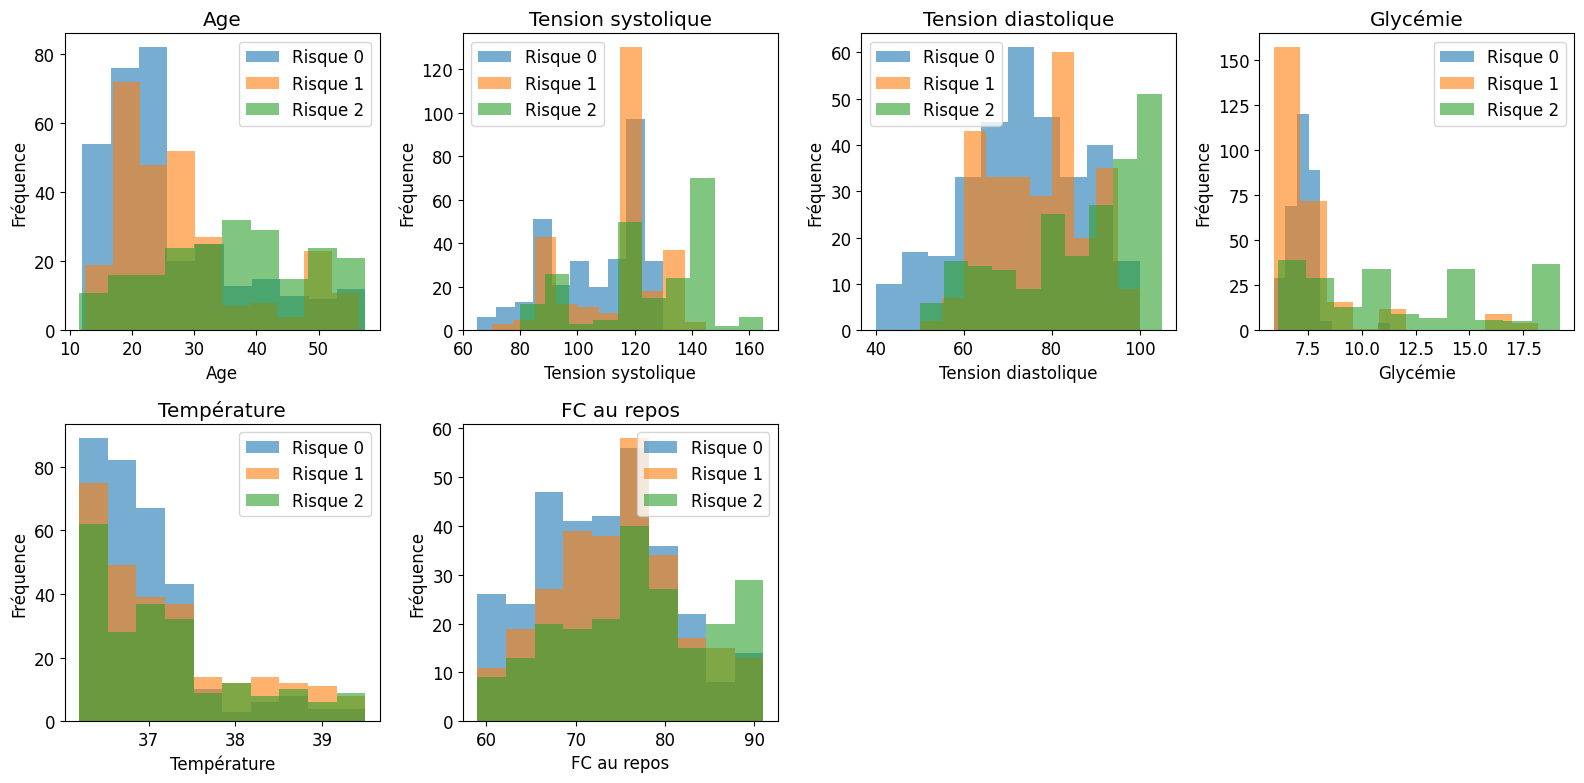

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
noms_variables = df_train.columns[:-1]

for i, nom_variable in enumerate(noms_variables):
    axe = axes[i]
    for niveau_risque in [0, 1, 2]:
        sous_ensemble = X_train[y_train == niveau_risque, i]
        axe.hist(sous_ensemble, bins=10, alpha=0.6, label=f'Risque {niveau_risque}')
    axe.set_title(nom_variable)
    axe.set_xlabel(nom_variable)
    axe.set_ylabel('Fréquence')
    axe.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

### Question 3 (1 pt)
Les valeurs prises par ces variables sont-elles surprenantes ? Cohérentes avec le degré de risque ?

Les valeurs sont cohérentes avec le degré de risque : les patientes à risque élevé ont en général un âge, une tension artérielle, une glycémie plus élevés, ce qui correspond aux facteurs de risque connus. 

On observe une légère augmentation de la FC au repos pour les patientes à risque élevé mais la séparation entre les classes reste moins nette que pour l'âge, la tension ou la glycémie.

La température ne semble pas très discriminante entre les groupes. 

### Question 4 (1 pt)
Pensez-vous qu'il va être facile/difficile de prédire le risque de grossesse à risque en utilisant ces 6 variables ?

Les graphiques montrent que certaines variables comme l’âge, la tension artérielle et la glycémie séparent assez bien les groupes, surtout pour les risques élevés. En revanche, la température et la fréquence cardiaque au repos n’apportent pas beaucoup d’information pour distinguer les classes. Il y a donc un certain recouvrement entre les groupes mais les écarts restent visibles pour plusieurs variables. On peut s’attendre à ce que le modèle arrive à distinguer une partie des cas même si la séparation ne sera pas parfaite. La prédiction ne sera pas triviale mais elle semble faisable. Ainsi, une analyse en composantes principales permettrait de réduire la dimensionnalité sans perdre trop d’information, ce qui simplifierait l’apprentissage et limiterait le risque de surapprentissage, surtout si certaines variables sont redondantes ou peu informatives.

## Réduction de dimension

Indépendamment de votre réponse à la question précédente, nous allons procéder à deux tentatives de réduction de dimension.

### Question 5 (1 pt)
Utilisez la décomposition en composantes principales de `X_train` pour visualiser les données en deux dimensions.

In [55]:
X = np.array(df_train.drop(columns=['Risque']))

# Standardisation des données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

(800, 2)


Text(0.5, 1.0, 'Représentation des données selon les 2 composantes principales')

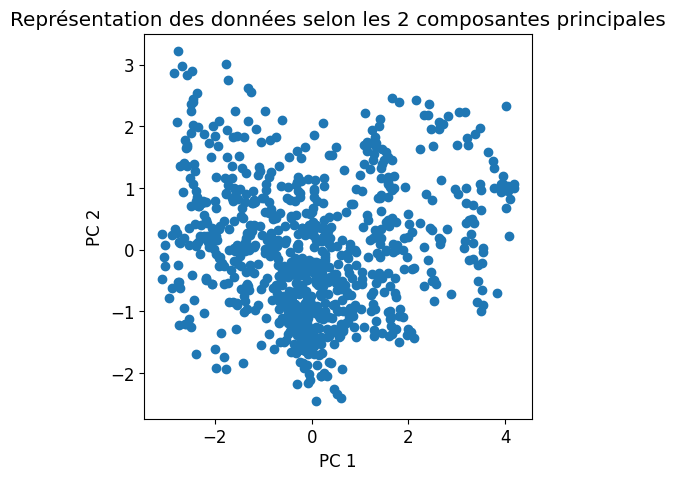

In [56]:
# Calcul de la nouvelle représentation des données (projection sur les 2 composantes principales) :
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

# Affichage du nuage de points représentant les données selon ces deux PC
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_projected[:, 0], X_projected[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('Représentation des données selon les 2 composantes principales')

### Question 6 (1 pt) 
Pensez-vous utile d'utiliser cette ACP pour réduire la dimension des données pour construire un prédicteur de risque de grossesse difficile ?

Proportion cumulative de variance expliquée des différentes PC :  [0.43311432 0.62957815 0.76548385 0.87845125 0.95558557 1.        ]


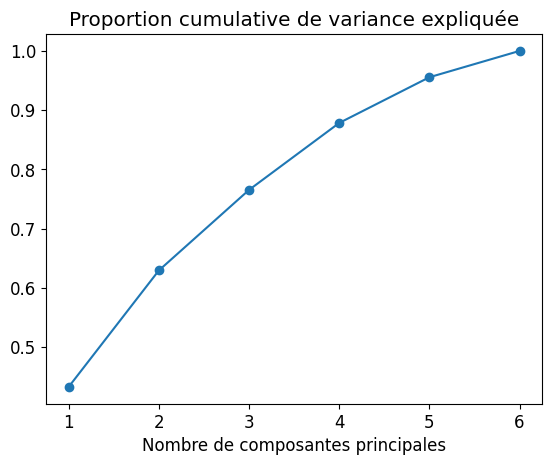

In [57]:
# Instanciation d'un objet PCA pour 6 composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

# Affichage de la proportion cumulative de variance expliquée par les différentes composantes
np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Nombre de composantes principales")
plt.title("Proportion cumulative de variance expliquée")

# Affichage des valeurs obtenues pour la proportion de variance expliquée 
print('Proportion cumulative de variance expliquée des différentes PC : ', np.cumsum(pca.explained_variance_ratio_))

En traçant la proportion cumulative de variance expliquéees, on remarque que 3 premières composantes expliquent à elles seules près de 76,5 %  de la variance, ce qui pourrait être suffisant pour construire un prédicteur de risque de grossesse difficile. Les 4 composantes principales expliquent environ 88 % de variance, ce qui semble être un très bon compromis entre la préservation de l'information et réduction de la dimension des données. À partir de la cinquième composante principale, la courbe tracée montre que le gain marginal en variance expliquée devient plus faible. Il serait ainsi intéressant de se contenter de 4 composantes principales pour réduire la dimension du problème.

### Question 7 (0,5 pt)
Affichez la matrice de corrélation entre les variables (étiquette exclue)

                          Age  Tension systolique  Tension diastolique  \
Age                  1.000000            0.482660             0.428986   
Tension systolique   0.482660            1.000000             0.728700   
Tension diastolique  0.428986            0.728700             1.000000   
Glycémie             0.523127            0.412167             0.409977   
Température         -0.218975           -0.239331            -0.224814   
FC au repos          0.034682           -0.064791            -0.085336   

                     Glycémie  Température  FC au repos  
Age                  0.523127    -0.218975     0.034682  
Tension systolique   0.412167    -0.239331    -0.064791  
Tension diastolique  0.409977    -0.224814    -0.085336  
Glycémie             1.000000    -0.095702     0.121770  
Température         -0.095702     1.000000     0.155140  
FC au repos          0.121770     0.155140     1.000000  


Text(0.5, 1.0, 'Corrélation entre les différentes variables')

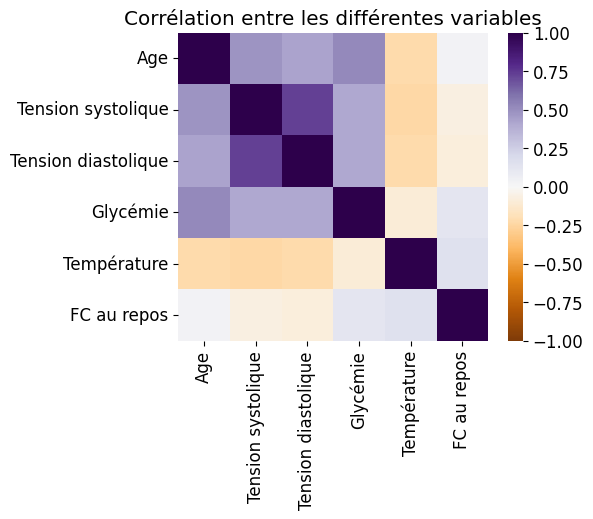

In [58]:
# Calcul de la matrice de corrélation deux à deux
corr_matrix = df_train.drop(columns=['Risque']).corr()
print(corr_matrix)

# Initialisation figure
plt.figure(figsize=(5, 4))

# Affichage heatmap
sns.heatmap(corr_matrix, 
            vmin=-1, # borne inf des valeurs à afficher
            vmax=1, # borne sup des valeurs à afficher
            center= 0, # valeur médiane des valeurs à afficher,
            cmap='PuOr', # colormap divergente de violet (PUrple) vers orange (ORange)
           )
# Titre
plt.title("Corrélation entre les différentes variables")

### Question 8 (0,5 pt)

Comment utiliser cette matrice de corrélation pour réduire la dimension des données ?

Cette matrice de corrélation révèle que les variables de la température et de la fréquence cardiaque au repos sont très peu corrélées à l'ensemble des autres variables (avec un coefficient de Pearson toujours inférieur à 0.25 en valeur absolue). Elles apportent donc chacune de l’information nouvelle. On observe ensuite que les quatre variables de l’âge, de la tension systolique, de la tension diastolique et de la glycémie sont quant à elles plutôt corrélés positivement entre elles (avec au minimum un coefficient de Pearson de 0.4). Ceci signifie qu'il existe une part de redondance dans l’information qu’elles apportent. On comprend donc qu'il serait possible de réduire la dimension du problème en synthétisant ces variables avec de nouvelles variables moins nombreuses mais d'autant plus discriminantes pour les données. Ce serait le principe de la réduction de dimension avec une analyse par composante principale, par exemple.  D'autre part, on peut utiliser cette matrice de corrélation pour réduire directement la dimension des données en sélectionnant des variables. Notamment, la tension systolique et la tension diastolique sont très fortement corrélées, avec un coefficient de Pearson de plus de 0,7. Il serait donc envisageable de supprimer l'une des deux variables sans perte conséquente d’information. On pourrait tester l'impact d'une telle suppression sur les performances du modèle prédictif développé en utilisant un jeu de validation pour aviser.

# 2. Classification «à risque» vs «sans risque»

Nous allons maintenant transformer les étiquettes en étiquettes binaire, en regroupant les risques obstétriques moyens et élevés. Les étiquettes `1` et `2` seront regroupées en une seule étiquette `1`.

In [59]:
# Copier le dataframe initial dans un nouveau dataframe 
df_train_risk_vs_norisk = df_train.copy()

# Regrouper les étiquettes 1 et 2
df_train_risk_vs_norisk['Risque'] = np.where(df_train['Risque']==2, 1, df_train['Risque'])

# Extraction de l'array d'étiquettes
y_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk['Risque'], dtype='int')

## Choix du critère d'évaluation
Pour cette section, on pourra se référer à la section 8.7.1 du poly.

### Question 9 (0,25 pt)
Quelle serait l'_accuracy_ (proportion d'observations correctement étiquetées) d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire (c'est-à-dire la classe ayant le plus grand nombre d'observations dans les données) ? 

In [60]:
# Bilan des étiquettes des observations :
print(f"nombre d'observations sans risque = {len(y_train_risk_vs_norisk) - sum(y_train_risk_vs_norisk)}")
print(f"nombre d'observations à risque = {sum(y_train_risk_vs_norisk)}")

nombre d'observations sans risque = 316
nombre d'observations à risque = 484


→ Notons $Nb = 800$ le nombre d’observations ainsi que $T_0$ et $T_1$ et $T_2$ le nombre d’étiquettes correctement étiquetées avec sans risque (indicé 0) ou à risque (indicé 1). On a alors :

$$ Accuracy = \frac{T_0 + T_1}{Nb} $$

Dans le cas d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire, qui est celle du risque absent (indicé 0), $T_0 = 316$ (toutes les observations dont l’étiquette est réellement 0 ont été correctement prédites) et $T_1 = 0$ (aucune observation n’est étiquetée à risque, 1). On en déduit l'accuracy de ce modèle :

$$ Accuracy = \frac{316}{800} = 0.395 $$

### Question 10 (0,25 pt) 
La __précision équilibrée__ (_balanced accuracy_) d'un classifieur binaire est donnée par :

$$BA = \frac12 \left( \frac{\text{TP}}{\text{TP}+\text{FN}} +  \frac{\text{TN}}{\text{TN}+\text{FP}} \right)$$

Expliquez pourquoi ce critère d'évaluation est plus pertinent que l'accuracy pour sélectionner un classifieur optimal.

L’accuracy quantifie la proportion totale d'observations correctement étiquetées. Cela peut s'avérer insuffisant pour sélectionner un classifieur optimal dans le cas où le caractère que l'on cherche à identifier (comme par exemple la présence d'un risque obstétrique élevé) est très minoritaire dans l'ensemble des observations. Effectivement même si toutes les observations du jeu de données correspondantes à un fort risque sont faussement étiquetées, cela aura un faible impact sur la valeur de l’accuracy. A titre d’exemple, les observations correspondantes à un fort risque représentent 1% du jeu de données le fait qu'elles soient toutes mal étiquetées fera au plus diminuer de 1% l’accuracy.

La précision équilibrée corrige cela en donnant la moyenne des taux d'erreurs dans chacune des 2 populations (les malades/sains ou ici les femme à fort/faible risque obstétrique). Il permet de mettre en valeur les performances du test sur chacune de ces 2 populations de manière équilibrée, même si l’une d’elle est nettement sur-représentée dans le jeu d’observations. 

Dans la suite du projet, nous utiliserons ce critère, implémenté dans la méthode [metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) de scikit-learn.

## Plus proche voisin
L'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 11 (0,5 pt)
En quoi consiste la phase d'entraînement d'un tel classifieur ?

Pour le plus proche voisin, il n’y a pas d’apprentissage au sens classique, puisqu'on garde simplement toutes les données du jeu d’entraînement en mémoire. L'algorithme se contente de stocker les observations du jeu d'entrainement, pour pouvoir ensuite mesurer la distance entre ces-dernières et de nouvelles observations. L’algorithme ne calcule pas de coefficients ou de modèle, et la phase d'entrainement ne consiste pas en une optimisation (comme par exemple pour les réseaux de neuronnes), mais plutôt en une mémorisation des données d'entrainement.

### Question 12 (0,5 pt)
Quelle précision équilibrée attendez-vous _sur le jeu d'entraînement_ d'un algorithme du plus proche voisin ? Pourquoi ?

Quand on applique le plus proche voisin avec k=1 sur le jeu d’entraînement, chaque point a pour plus proche voisin lui-même (distance nulle) : il n’y a ni faux positifs ni faux négatifs. Donc, l’algorithme retrouve forcément la bonne étiquette pour chaque point sauf si deux points différents ont exactement les mêmes coordonnées mais des étiquettes différentes (ce qui n'est pas le cas ici comme cela est démontré ci-dessous). Ainsi, la précision équilibrée du plus proche voisin sera de 1. 

Cependant, ce résultat parfait n'est valable que sur le jeu d'entraînement car l'algorithme retrouve systématiquement l'étiquette de chaque point déjà vu. Cela montre l'importance d'utiliser un jeu de validation (ou une validation croisée) : cela permet d'évaluer la capacité réelle du modèle à généraliser sur de nouvelles données et non simplement à "mémoriser" les exemples d'entraînement. Ainsi, sans jeu de validation, on risque de surestimer la performance du modèle et de ne pas détecter un éventuel surapprentissage.


In [61]:
doublons = df_train.groupby(list(df_train.columns[:-1]))['Risque'].nunique()
problemes = doublons[doublons > 1]

print("Nombre de cas problématiques (2 points différents ayant les mêmes coordonnées mais des étiquettes différentes) :", problemes.shape[0])
if problemes.shape[0] > 0:
    print("Exemples de doublons avec étiquettes différentes :")
    print(problemes)

Nombre de cas problématiques (2 points différents ayant les mêmes coordonnées mais des étiquettes différentes) : 0


### Question 13 (0,5 pt)
Vérifiez votre réponse sur les données, en utilisant la classe [neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_risk_vs_norisk)

y_pred = knn.predict(X_train)

ba = balanced_accuracy_score(y_train_risk_vs_norisk, y_pred)
print(f"Précision équilibrée: {ba}")

Précision équilibrée: 1.0


### Quesion 14 (0,5 pt)
Pour cet algorithme, vaut-il mieux utiliser les données d'origine ou les données centrées-réduites ? Justifiez votre réponse.

Pour cet algorithme du plus proche voisin, il est nettement préférable d'utiliser des données standardisées (centrées et réduites). En effet, ceci permet d’attribuer le même poids à chacune des variables dans la prédiction de l'étiquette associée à une nouvelle observation. Puisque l'algorithme prédictif repose sur un calcul de distance entre la nouvelle observation et celles du jeu d'entraînement, utiliser des données non standardisées revient à donner plus d’importance à des variables qui prennent de grandes valeurs (comme par exemple ici la tension systolique exprimée en mmHg, dont l’ordre de grandeur est de 100) par rapport à celle qui prennent des valeurs plus faible (comme par exemple ici la glycémie exprimée en mmol/L, inférieure à 20, et de 10 en ordre de grandeur). La standardisation des variables les ramène sur une même échelle, ce qui évite ce problème.

On vérifie ci-dessous que l’accuracy du modèle utilisant les données standardisées et bien de 1 comme attendu.

In [63]:
# Standardisation des données déjà effectuée à la question 5 et stockée dans X_scaled

# Calcul de l'accuracy du modèle obtenu avec les données standardisées
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y_train_risk_vs_norisk)

y_pred = knn.predict(X_scaled)

ba = balanced_accuracy_score(y_train_risk_vs_norisk, y_pred)
print(f"Précision équilibrée (k=1): {ba}")


Précision équilibrée (k=1): 1.0


## K plus proches voisins
L'algorithme des $K$ plus proche voisins associe à une observation $\vec{x}$ l’étiquette qui est majoritaires parmi celle des $K$ points du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 15 (1,5 pt)
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ (voir amphi 7 et PC5) pour déterminer une valeur optimale de $K$. 

* Justifiez votre choix de grille de valeurs.
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

On a au total 800 observations et il semble cohérent que le nombre K de plus proches voisins à considérer dans une prédiction ne dépasse pas 10% du total des observations d'entraînement, soit 80. On fait donc le choix d'une grille de test de l'hyper-paramètre K de la forme $[\![1,80]\!]$. On la balaye une première fois avec un pas de 5, puis on affine le balayage dans la zone qui semble contenir le maximum de précision équilibrée.


In [64]:
from sklearn import model_selection

# instantier un objet KFold 
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Définir la grille de valeurs de l'hyperparamètre K 
Ks = np.arange(1, 100, 5,'int') 

# Définir le modèle à évaluer
knn = KNeighborsClassifier()

# Instantier la recherche sur grille
grid_knn = model_selection.GridSearchCV(knn, {'n_neighbors': Ks}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_knn.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='balanced_accuracy')

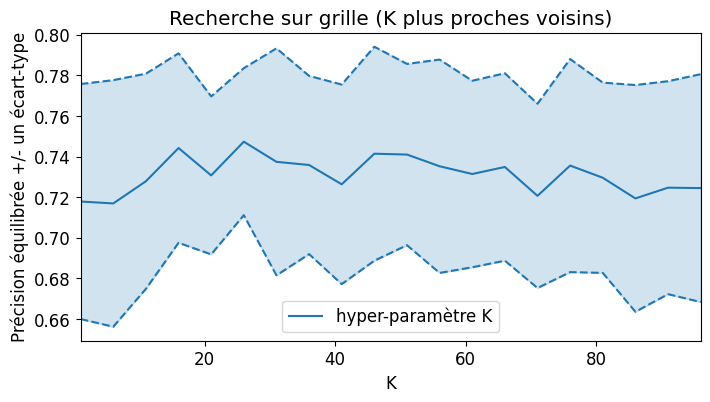

In [65]:
# Affichage des résultats de l'exploration de la grille de valeurs de K pour l'algo des K plus proches voisins

plt.figure(figsize=(8, 4))

ba_knn = grid_knn.cv_results_['mean_test_score']
std_error_knn = grid_knn.cv_results_['std_test_score']

# afficher les précisions équilibrées avec une échelle logarithmique pour les abscisses :
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn, 
             label="hyper-paramètre K", color='tab:blue')
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn + std_error_knn, 
             color='tab:blue', linestyle='dashed')
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn - std_error_knn, 
             color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(Ks, (ba_knn + std_error_knn), (ba_knn - std_error_knn), 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("K")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Ks[0], Ks[-1]])
plt.title("Recherche sur grille (K plus proches voisins)")
plt.legend(loc='best')

Globalement, la plage de variation de la précision équilibrée suivant les valeurs de K est plutôt limitée, s'étendant entre près de 0,72 et 0,75. On observe d’abord une augmentation importante de cette précision des valeurs faibles de K (inférieures à 18), ce qui dénote un gain initial important de précision puisque le modèle obtenu avec des valeurs trop faibles de K est trop simple et donc biaisé. Puis, pour K compris entre 18 et 35, la valeur de la précision fluctue autour d'une valeur avoisinant 0,75, avant d'entamer ceux qui semble être une décroissance pour les valeurs plus élevées de K. En considérant des voisins trop éloignés, le modèle dilue l’information apportée par des caractéristiques partagées uniquement avec des voisins proches.

La zone $[\![15,35]\!]$ semble contenir la valeur de K pour lequel le maximum de précision équilibrée est atteint. On la balaye donc avec un pas unitaire pour déterminer cette valeur optimale de l'hyper-paramètre K. On affiche cette valeur Kopt, ainsi que la précision équilibrée correspondante.

In [66]:
# instantier un objet KFold 
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Définir la grille de valeurs de l'hyperparamètre K 
Ks = np.arange(15, 35, 1,'int') 

# Définir le modèle à évaluer
knn = KNeighborsClassifier()

# Instantier la recherche sur grille
grid_knn = model_selection.GridSearchCV(knn, {'n_neighbors': Ks}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_knn.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34])},
             scoring='balanced_accuracy')

La valeur optimale de K est Kopt = 27
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.7498 ± 0.0442


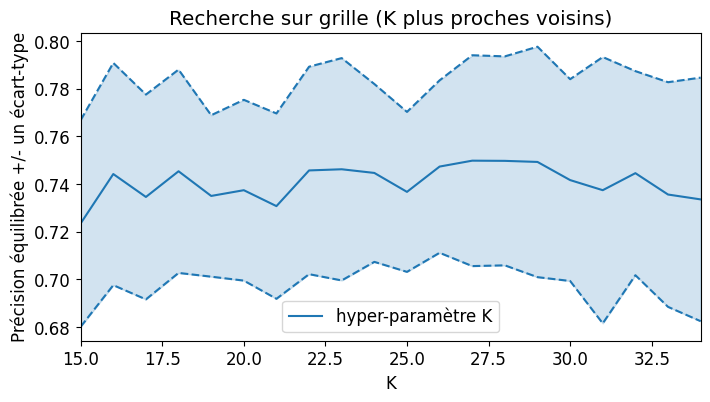

In [67]:
# Affichage des résultats de l'exploration de la grille de valeurs de K pour l'algo des K plus proches voisins

plt.figure(figsize=(8, 4))

ba_knn = grid_knn.cv_results_['mean_test_score']
std_error_knn = grid_knn.cv_results_['std_test_score']

# afficher les précisions équilibrées avec une échelle logarithmique pour les abscisses :
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn, 
             label="hyper-paramètre K", color='tab:blue')
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn + std_error_knn, 
             color='tab:blue', linestyle='dashed')
plt.plot(grid_knn.cv_results_['param_n_neighbors'], ba_knn - std_error_knn, 
             color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(Ks, (ba_knn + std_error_knn), (ba_knn - std_error_knn), 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("K")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Ks[0], Ks[-1]])
plt.title("Recherche sur grille (K plus proches voisins)")
plt.legend(loc='best')

# Recherche valeur optimale de K, maximisant la précision équilibrée Kopt
Kopt = grid_knn.best_params_['n_neighbors']
print(f"La valeur optimale de K est Kopt = {Kopt}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_knn.best_score_:.4f} ± {std_error_knn[grid_knn.best_index_]:.4f}")




## Régression logistique
Le pendant pour la classification binaire de la régression linéaire (amphi 7 et PC 5) est la __régression logistique__ (PC 6). Dans scikit-learn, elle est implémentée par la classe [linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Question 16 (1 pt) 
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ pour déterminer une valeur optimale du coefficient de régularisation d'une régression logistique. 

* Justifiez votre choix de type de régularisation et de grille de valeurs. 
* Illustrez par un graphique approprié votre exploration de cette grille. 
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

On choisi une régularisation rigide (L2). En effet, on a précédemment observé que notre jeu de données présentait certaines assez fortement corrélées (comme la pression systolique et la pression diastolique). Or on sait que dans ce cas, la régularisation L1 (lasso) conduit à sélectionner l'une d'entre elles de manière aléatoire et d'exclure l'autre du modèle prédictif entraîné. Dans cette partie, on n'a pas souhaité réduire la dimension du problème (en conservant donc la totalité de l'information disponible), ce type de régularisation ne semble donc pas approprié. Il l'est d'autant plus qu'on ne cherche pas particulièrement l'interprétabilité du modèle (ce qu'améliore la régularisation L1 en mettant secteur d'un coefficient de la régression à zéro), mais plutôt sa performance.

On choisit une grille logarithmique pour les valeurs du coefficient de régularisation, en notant que dans l'argument de “LogisticRegression” c'est l'inverse de ce coefficient, noté $C$ qui apparaît. On balaye donc 40 valeurs de C prises entre $10^{-4}$ et $10^{4}$ (ce qui correspont également à des valeurs du coefficient de régularisation prises entre $10^{-4}$ et $10^{4}$). On affinera la recherche ensuite, dans la zone qui semble contenir le maximum de précision équilibrée.


In [68]:
from sklearn.linear_model import LogisticRegression

# Définir la grille de valeurs de l'hyperparamètre C  
Cs = np.logspace(-4, 4, 50) 

# Définir le modèle à évaluer
logireg = LogisticRegression('l2')

# Instantier la recherche sur grille
grid_logireg = model_selection.GridSearchCV(logireg, {'C': Cs}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_logireg.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             scoring='balanced_accuracy')

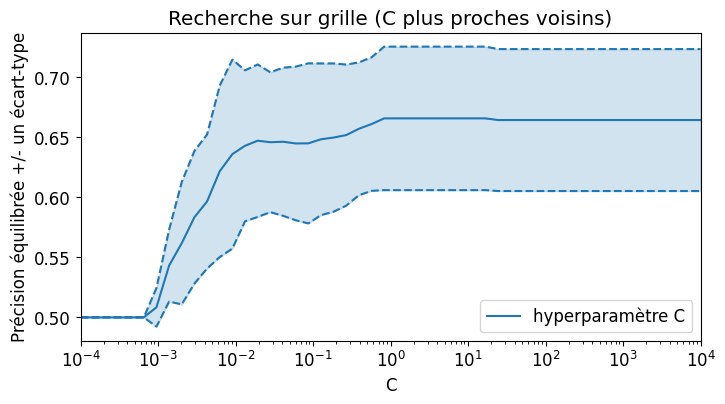

In [69]:
# Affichage des résultats de l'exploration de la grille de valeurs de C pour la régression logitique

plt.figure(figsize=(8, 4))

ba_logireg = grid_logireg.cv_results_['mean_test_score']
std_error_logireg = grid_logireg.cv_results_['std_test_score']

# afficher les précisions équilibrées avec une échelle logarithmique pour les abscisses :
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg, 
             label="hyperparamètre C", color='tab:blue')
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg + std_error_logireg, 
             color='tab:blue', linestyle='dashed')
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg - std_error_logireg, 
             color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(Cs, (ba_logireg + std_error_logireg), (ba_logireg - std_error_logireg), 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("C")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Cs[0], Cs[-1]])
plt.title("Recherche sur grille (C plus proches voisins)")
plt.legend(loc='best')

Quand $C$ tend vers 0 (ie le coefficient de régularisation tend vers l'infini) le risque empirique ne compte plus devant le terme de régularisation, et le modèle apris ne compte que des poids sont nuls. Ceci mène à précision équilibrée constante de 1/2 puisque la fonction de décission est alors constante égale à 1/2, ce qui se traduit par un modèle prédictif attribuant toujours la même étiquette aux observations qu'on lui soumet (0 ou 1, suivant la valeur du seuil retenu). Ainsi, si l’on est sans risque (TN en reprenant les notations de la question 10), la probabilité d'être étiquetée N ou P par le modèle est la même, tout comme si l’on est à risque (TP). L’expression de la précision équilibrée conduit bien à $BA = 0.5(0.5 + 0.5) = 0.5$.

A l'inverse, quand $C$ tend vers l'infini (ie le coefficient de régularisation tend vers 0), on se rapproche d'une régression logistique non régularisée, qui a précision équilibrée la valeur asymptotique de la courbe tracée.

Le maximum de précision équilibrée semble atteint pour une valeur de C comprise entre 0,1 et 100. On balaye donc cette région avec un pas plus fin pour déterminer la valeur optimale de l'hyper-paramètre C associée. On affiche cette valeur Copt, ainsi que la précision équilibrée correspondante.

In [70]:
# Définir la grille de valeurs de l'hyperparamètre C  
Cs = np.logspace(-1, 2, 50) 

# Définir le modèle à évaluer
logireg = LogisticRegression('l2')

# Instantier la recherche sur grille
grid_logireg = model_selection.GridSearchCV(logireg, {'C': Cs}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_logireg.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([  0.1       ,   0.11513954,   0.13257114,   0.1526418 ,
         0.17575106,   0.20235896,   0.23299518,   0.26826958,
         0.30888436,   0.35564803,   0.40949151,   0.47148664,
         0.54286754,   0.62505519,   0.71968567,   0.82864277,
         0.95409548,   1.09854114,   1.26485522,   1.45634848,
         1.67683294,   1.93069773,   2.22299648,   2.55954792,
         2.9470517 ,   3.39322177,   3.90693994,   4.49843267,
         5.17947468,   5.96362332,   6.86648845,   7.90604321,
         9.10298178,  10.48113134,  12.06792641,  13.89495494,
        15.9985872 ,  18.42069969,  21.20950888,  24.42053095,
        28.11768698,  32.37457543,  37.2759372 ,  42.9193426 ,
        49.41713361,  56.89866029,  65.51285569,  75.43120063,
        86.85113738, 100.        ])},
             scoring='balanced_accuracy')

La valeur optimale de C est Copt = 0.7196856730011519
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.6654 ± 0.0597


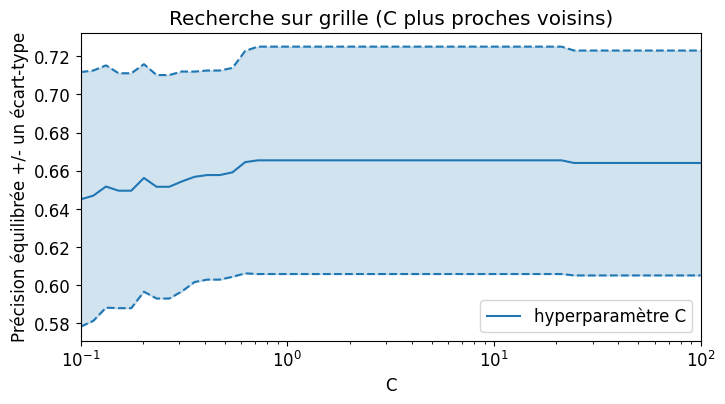

In [71]:
# Affichage des résultats de l'exploration de la grille de valeurs de C pour la régression logitique

plt.figure(figsize=(8, 4))

ba_logireg = grid_logireg.cv_results_['mean_test_score']
std_error_logireg = grid_logireg.cv_results_['std_test_score']

# afficher les précisions équilibrées avec une échelle logarithmique pour les abscisses :
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg, 
             label="hyperparamètre C", color='tab:blue')
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg + std_error_logireg, 
             color='tab:blue', linestyle='dashed')
plt.semilogx(grid_logireg.cv_results_['param_C'], ba_logireg - std_error_logireg, 
             color='tab:blue', linestyle='dashed')

# colorer l'espace entre les courbes représentant les écarts-types
plt.fill_between(Cs, (ba_logireg + std_error_logireg), (ba_logireg - std_error_logireg), 
                 color='tab:blue',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("C")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Cs[0], Cs[-1]])
plt.title("Recherche sur grille (C plus proches voisins)")
plt.legend(loc='best')

# Recherche valeur optimale de C, maximisant la précision équilibrée Copt
Copt = grid_logireg.best_params_['C']
print(f"La valeur optimale de C est Copt = {Copt}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_logireg.best_score_:.4f} ± {std_error_logireg[grid_logireg.best_index_]:.4f}")


## Algorithme non-linéaire

### Question 17 (2pt)
Choisissez maintenant un algorithme permettant d'apprendre un modèle non-linéaire parmi ceux du chapitre 9 :
* arbre de décision : [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* forêt aléatoire : [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* machine à vecteur de support à noyau : [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* perceptron multi-couche : [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Utilisez encore une fois une recherche sur grille avec une validation croisée en 10 _folds_ pour sélectionner le(s) hyperparamètre(s) le(s) plus pertinent(s).

* Justifiez votre choix d'hyperparamètre(s) à optimiser.
* Justifiez votre choix de grille de valeurs pour ces ou cet hyperparèmtre(s).
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la ou les valeur(s) optimale(s) d'hyperparamètre(s) et la précision équilibrée correspondante.

On choisit le modèle non-linéaire de la forêt aléatoire. Les hyperparamètres à optimiser sont le nombre N d'arbre de décision du modèle (n_estimators dans l'argument de RandomForestClassifier) ainsi que la fonction de mesure de la qualité des divisions opérées à chaque noeuds lors de l'apprentissage du modèle (criterion). Ici, il ne semble pas pertinent d’optimiser le nombre maximal de variables à considérer à chaque division lors de l'apprentissage,puisque dans le cadre d'un problème de classification à 6 variables il est préconisé d'utiliser $\sqrt 6$ variables à considérer à chaque division. 

Il existe différentes variantes du critère, on s'interrogera ici sur les performances de la fonction gini ou de la fonction entropie (qui est équivalente à celle de perte logarithmique). On ignorera l'erreur quadratique, qui est un critère appliquable pour les régressions et non la classification. Concernant le nombre N d'arbres du modèle, on explorera une large plage de valeurs, entre 5 et 100, avec  observations, puis on affinera le balayage dans la zone où semble se trouver le maximum de précision équilibrée. En réalité, on s'est assuré qu'il n'était pas utile d'augmenter au-delà de la centaine ce paramètre, mais se limitera ici à 100 pour ne pas que le temps d'exécution de ce Notebook soit déraisonnable.

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Définir la grille de valeurs des hyperparamètres n_estimators et criterion
Nb_estimators = np.array([5,10,20,50,70,80,100])
Criteria = ['gini','entropy']

# Définir le modèle à évaluer
forest = RandomForestClassifier()

# Instantier la recherche sur grille
grid_forest = model_selection.GridSearchCV(forest, {'n_estimators': Nb_estimators, 'criterion': Criteria}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_forest.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([  5,  10,  20,  50,  70,  80, 100])},
             scoring='balanced_accuracy')

Le critère de mesure de la qualité des divisions est la fonction : entropy
La valeur optimale de N est Nopt = 50
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.8013 ± 0.0432


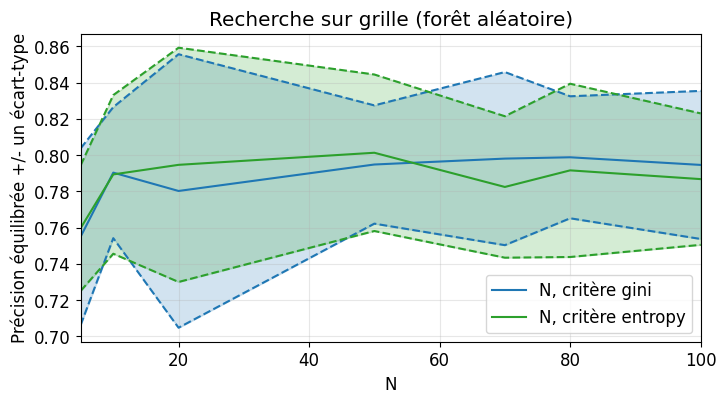

In [73]:
# Affichage des résultats de l'exploration de la grille de valeurs pour la forêt aléatoire

plt.figure(figsize=(8, 4))

ba_forest = grid_forest.cv_results_['mean_test_score']
std_error_forest = grid_forest.cv_results_['std_test_score']

# Séparation des résultats par critère de mesure de la qualité des divisions
for criterion in Criteria:
    mask = [criterion_tree == criterion for criterion_tree in grid_forest.cv_results_['param_criterion']]
   
    # afficher les précisions équilibrées 
    plt.plot(Nb_estimators, ba_forest[mask], 
             label=f"N, critère {criterion}", color='tab:blue' if criterion == 'gini' else 'tab:green')
    plt.plot(Nb_estimators, ba_forest[mask] + std_error_forest[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    plt.plot(Nb_estimators, ba_forest[mask] - std_error_forest[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    
    # colorer l'espace entre les courbes représentant les écarts-types
    plt.fill_between(Nb_estimators, ( ba_forest[mask] - std_error_forest[mask]), ( ba_forest[mask] + std_error_forest[mask]), 
                 color='tab:blue' if criterion == 'gini' else 'tab:green',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision équilibrée")
plt.title("Performance de la forêt aléatoire avec intervalle de confiance")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Mise en forme
plt.xlabel("N")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Nb_estimators[0], Nb_estimators[-1]])
plt.title("Recherche sur grille (forêt aléatoire)")
plt.legend(loc='best')

# Recherche des paramètres optimaux maximisant la précision équilibrée (critère et Nopt)
Nopt = grid_forest.best_params_['n_estimators']
print(f"Le critère de mesure de la qualité des divisions est la fonction : {grid_forest.best_params_['criterion']}")
print(f"La valeur optimale de N est Nopt = {Nopt}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_forest.best_score_:.4f} ± {std_error_forest[grid_forest.best_index_]:.4f}")

Les 2 critères semblent très proches en terme de performance, à partir d'un nombre suffisant d'arbres (environ une dizaine). Effectivement, les deux fonctions critères sont très proches les unes des autres, à moins d'un écart-type les unes des autres. La plus performante varie d'une exécution à l'autre de nous programmes. Il semble que ces différences entre les itérations proviennent de l'aléatoire de la répartition des observations entre les différents folds lors de la validation croisée. On retient donc arbitrairement la fonction entropie.

Concernant l'impact sur les performances de l'hyper-paramètre N, on constate que le maximum de précision équilibrée est parfois atteint pour une valeur de N comprise entre 40 et 70 mais pour des valeurs de plusieurs centaines au cours d'aurtres exécutions. Sachant que, de nouveau, les performances obtenues dans ces 2 cas sont vraiment très proches, on décide de se concentrer sur la valeur de N optimale (ou presque selon les exécutions) comprises entre 40 et 70. Ainsi, on détermine puis affiche la valeur optimale de l'hyper-paramètre N dans cette plage de valeurs, notée Nopt, ainsi que la précision équilibrée correspondante.

In [74]:
# Définir la grille de valeurs des hyperparamètres n_estimators et criterion
Nb_estimators = np.array([40,45,50,55,60,65,70])
Criteria = ['gini']

# Définir le modèle à évaluer
forest = RandomForestClassifier()

# Instantier la recherche sur grille
grid_forest = model_selection.GridSearchCV(forest, {'n_estimators': Nb_estimators, 'criterion': Criteria}, 
                                    cv=kf, # on utilise les folds déjà définis
                                    scoring='balanced_accuracy'
                                   )

# Utiliser la recherche sur grille
grid_forest.fit(X_scaled, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'n_estimators': array([40, 45, 50, 55, 60, 65, 70])},
             scoring='balanced_accuracy')

Le critère de mesure de la qualité des divisions retenu est la fonction : gini
La valeur optimale de N est Nopt = 50
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.8022 ± 0.0447


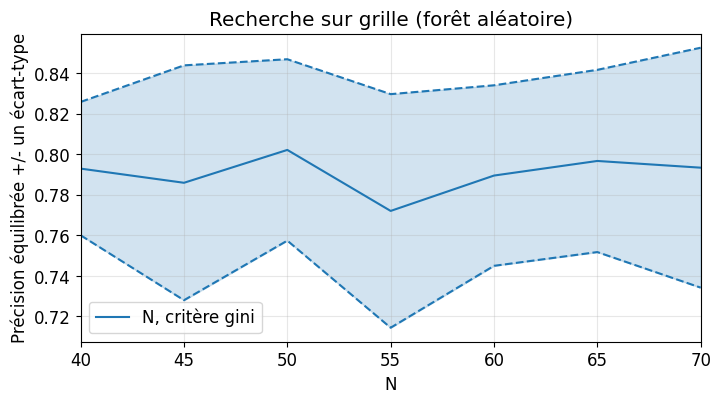

In [75]:
# Affichage des résultats de l'exploration de la grille de valeurs pour la forêt aléatoire

plt.figure(figsize=(8, 4))

ba_forest = grid_forest.cv_results_['mean_test_score']
std_error_forest = grid_forest.cv_results_['std_test_score']

# Séparation des résultats par critère de mesure de la qualité des divisions
for criterion in Criteria:
    mask = [criterion_tree == criterion for criterion_tree in grid_forest.cv_results_['param_criterion']]
   
    # afficher les précisions équilibrées 
    plt.plot(Nb_estimators, ba_forest[mask], 
             label=f"N, critère {criterion}", color='tab:blue' if criterion == 'gini' else 'tab:green')
    plt.plot(Nb_estimators, ba_forest[mask] + std_error_forest[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    plt.plot(Nb_estimators, ba_forest[mask] - std_error_forest[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    
    # colorer l'espace entre les courbes représentant les écarts-types
    plt.fill_between(Nb_estimators, ( ba_forest[mask] - std_error_forest[mask]), ( ba_forest[mask] + std_error_forest[mask]), 
                 color='tab:blue' if criterion == 'gini' else 'tab:green',
                 alpha=0.2, # contrôle la transparence
                )

# Mise en forme
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision équilibrée")
plt.title("Performance de la forêt aléatoire avec intervalle de confiance")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Mise en forme
plt.xlabel("N")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Nb_estimators[0], Nb_estimators[-1]])
plt.title("Recherche sur grille (forêt aléatoire)")
plt.legend(loc='best')

# Recherche des paramètres optimaux maximisant la précision équilibrée (critère et Nopt)
Nopt = grid_forest.best_params_['n_estimators']
print(f"Le critère de mesure de la qualité des divisions retenu est la fonction : {grid_forest.best_params_['criterion']}")
print(f"La valeur optimale de N est Nopt = {Nopt}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_forest.best_score_:.4f} ± {std_error_forest[grid_forest.best_index_]:.4f}")

## Classification après réduction de dimension

Nous allons maintenant évaluer l'impact d'une réduction de dimension sur la qualité de l'apprentissage.

### Question 18 (0,25 pt)
Quel algorithme (k plus proches voisins ; régression logistique ; algorithme non-linéaire de la question 16) vous a permis d'obtenir la meilleure performance ? 

On rappelle ci-dessous les performances des différents modèles obtenus :

In [76]:
Kopt = grid_knn.best_params_['n_neighbors']
KNN_score = grid_knn.best_score_
KNN_std = grid_knn.cv_results_['std_test_score'][grid_knn.best_index_]

Copt = grid_logireg.best_params_['C']
LogReg_score = grid_logireg.best_score_
LogReg_std = grid_logireg.cv_results_['std_test_score'][grid_logireg.best_index_]

Nopt = grid_forest.best_params_['n_estimators']
Forest_score = grid_forest.best_score_
Forest_std = grid_forest.cv_results_['std_test_score'][grid_forest.best_index_]

tableau_perf = pd.DataFrame({
    "Algorithme": [
        "K plus proches voisins",
        "Régression logistique",
        "Forêt aléatoire"
    ],
    "Valeur optimale de l'hyperparamètre": [
        f"K = {Kopt}",
        f"C = {Copt}",
        f"N = {Nopt}"
    ],
    "Précision équilibrée (± écart-type)": [
        f"{KNN_score:.3f} ± {KNN_std:.3f}",
        f"{LogReg_score:.3f} ± {LogReg_std:.3f}",
        f"{Forest_score:.3f} ± {Forest_std:.3f}"
    ]
})

display(tableau_perf)

,Algorithme,Valeur optimale de l'hyperparamètre,Précision équilibrée (± écart-type)
0,K plus proches voisins,K = 27,0.750 ± 0.044
1,Régression logistique,C = 0.7196856730011519,0.665 ± 0.060
2,Forêt aléatoire,N = 50,0.802 ± 0.045


Parmi les trois algorithmes testés, c’est la forêt aléatoire qui a permis d’obtenir la meilleure performance lors de la validation croisée.

### Quesion 19 (0,25 pt)
Utilisez le travail des questions 4 à 7 pour créer une nouvelle matrice représentant les données dans moins de dimensions qu'originellement. 

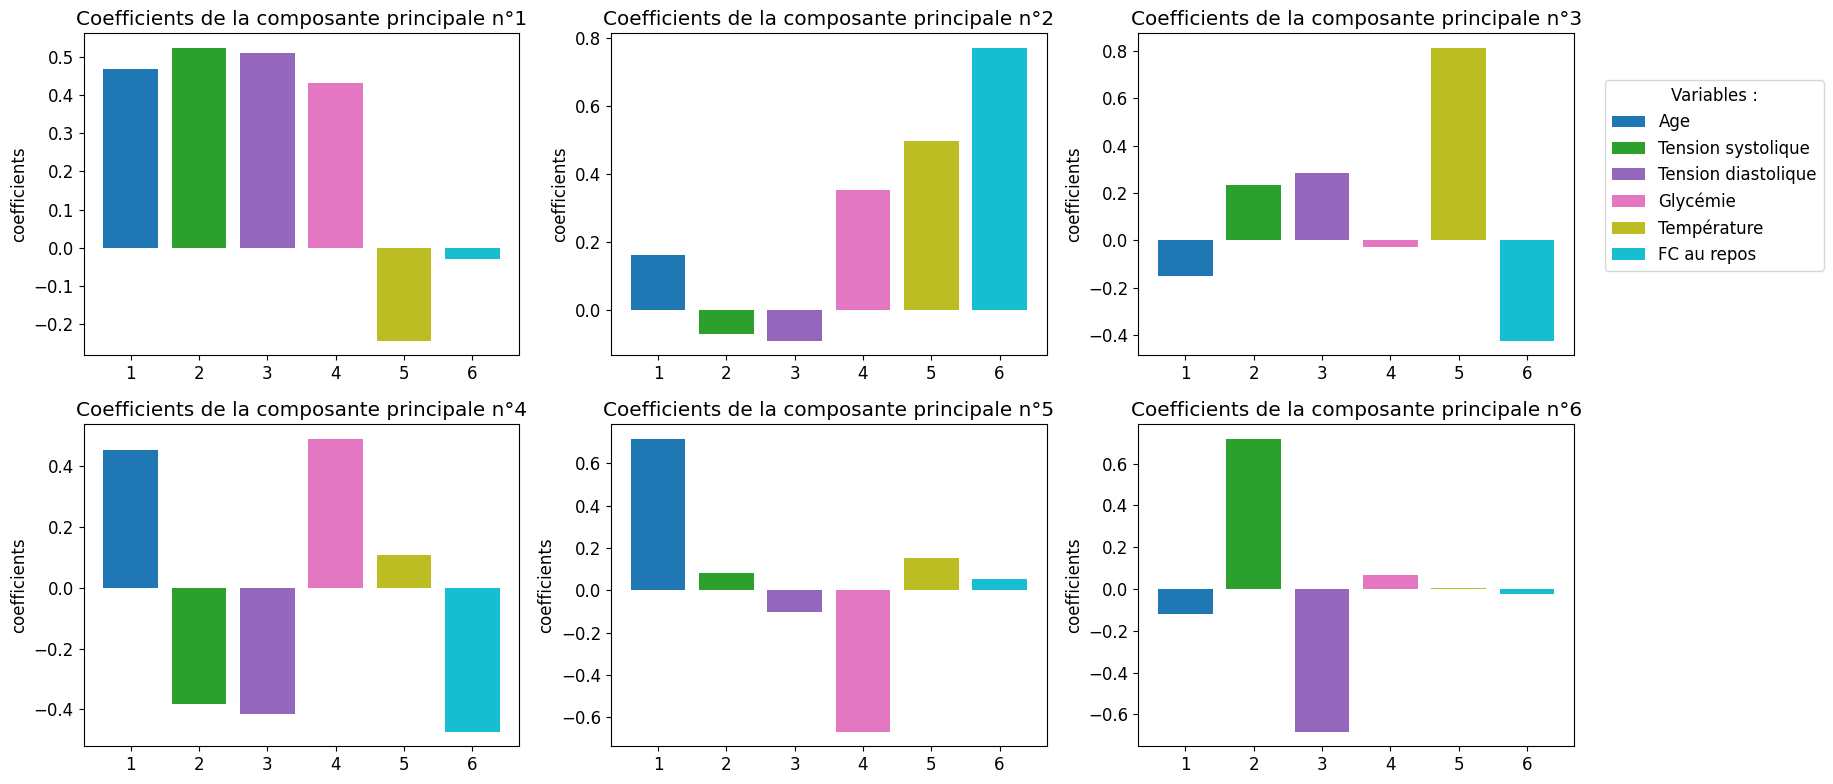

In [77]:
# Analyse des PC 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()
colors = plt.cm.tab10(np.linspace(0, 1, 6))

for i in range(6):
    axe = axes[i]
    diagramme_barres = axe.bar(range(1,7),pca.components_[i],color=colors)
    axe.set_title(f"Coefficients de la composante principale n°{i+1}")
    axe.set_ylabel('coefficients')

fig.legend(diagramme_barres, list(noms_variables), 
           title="Variables :",
           loc='upper right', 
           bbox_to_anchor=(1.15, 0.9))

plt.tight_layout()

Pas forcément judicieux de supprimer une variable pour réduire la dimension (on se prive malgré tout d'une parti de l'information, puisque les 2 pressions sont corrélées à 70% et non pleinement colinéaires), plutôt utiliser une PCA qui les utilise toutes, et s'affranchier des 2 dernières PC (pour réduire d'un tiers la dimension).

In [78]:
# Nouvelle matrice représentant les données dans 4 dimensions. 
from sklearn.decomposition import PCA

pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit_transform(X_scaled)

### Question 20 (0,25 pt)
Utilisez encore une fois une recherche sur grille pour optimiser les performances de cet algorithme, mais entrainé sur cette nouvelle matrice.

In [79]:
from sklearn.decomposition import PCA

pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit_transform(X_scaled)

# Recherche sur grille pour la forêt aléatoire sur les données réduites
Nb_estimators = np.array([5,10,20,50,70,80,100])
Criteria = ['gini','entropy']

forest = RandomForestClassifier()

grid_forest_pca = model_selection.GridSearchCV(
    forest,
    {'n_estimators': Nb_estimators, 'criterion': Criteria},
    cv=kf,
    scoring='balanced_accuracy'
)
grid_forest_pca.fit(X_pca4, y_train_risk_vs_norisk)



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([  5,  10,  20,  50,  70,  80, 100])},
             scoring='balanced_accuracy')

Le critère de mesure de la qualité des divisions est la fonction : gini
La valeur optimale de N (PCA) est Nopt = 20
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.7154 ± 0.0572


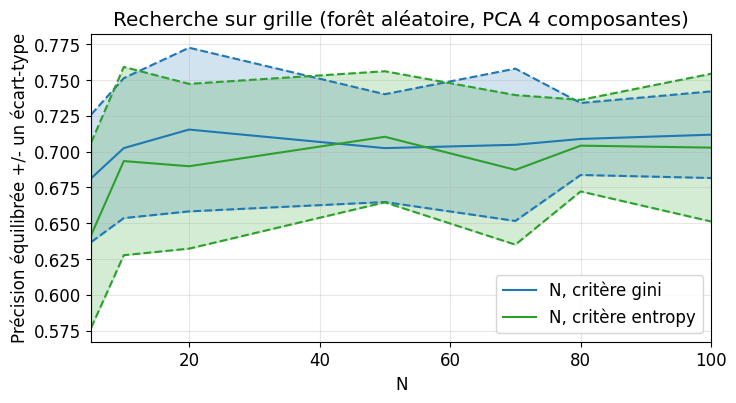

In [80]:
# Affichage des résultats de l'exploration de la grille de valeurs pour la forêt aléatoire (PCA)

plt.figure(figsize=(8, 4))

ba_forest_pca = grid_forest_pca.cv_results_['mean_test_score']
std_error_forest_pca = grid_forest_pca.cv_results_['std_test_score']

for criterion in Criteria:
    mask = [criterion_tree == criterion for criterion_tree in grid_forest_pca.cv_results_['param_criterion']]

    plt.plot(Nb_estimators, ba_forest_pca[mask], 
             label=f"N, critère {criterion}", color='tab:blue' if criterion == 'gini' else 'tab:green')
    plt.plot(Nb_estimators, ba_forest_pca[mask] + std_error_forest_pca[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    plt.plot(Nb_estimators, ba_forest_pca[mask] - std_error_forest_pca[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    
    plt.fill_between(Nb_estimators, 
                     ba_forest_pca[mask] - std_error_forest_pca[mask], 
                     ba_forest_pca[mask] + std_error_forest_pca[mask], 
                     color='tab:blue' if criterion == 'gini' else 'tab:green', alpha=0.2)

plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision équilibrée")
plt.title("Performance de la forêt aléatoire (PCA 4 composantes) avec intervalle de confiance")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

plt.xlabel("N")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Nb_estimators[0], Nb_estimators[-1]])
plt.title("Recherche sur grille (forêt aléatoire, PCA 4 composantes)")
plt.legend(loc='best')

Nopt_pca = grid_forest_pca.best_params_['n_estimators']
print(f"Le critère de mesure de la qualité des divisions est la fonction : {grid_forest.best_params_['criterion']}")
print(f"La valeur optimale de N (PCA) est Nopt = {Nopt_pca}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_forest_pca.best_score_:.4f} ± {std_error_forest_pca[grid_forest_pca.best_index_]:.4f}")

In [81]:
from sklearn.decomposition import PCA

pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit_transform(X_scaled)

# Recherche sur grille pour la forêt aléatoire sur les données réduites
Nb_estimators = np.array([40,45,50,55,60])
Criteria = ['gini']

forest = RandomForestClassifier()

grid_forest_pca = model_selection.GridSearchCV(
    forest,
    {'n_estimators': Nb_estimators, 'criterion': Criteria},
    cv=kf,
    scoring='balanced_accuracy'
)
grid_forest_pca.fit(X_pca4, y_train_risk_vs_norisk)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'n_estimators': array([40, 45, 50, 55, 60])},
             scoring='balanced_accuracy')

Le critère de mesure de la qualité des divisions est la fonction : gini
La valeur optimale de N (PCA) est Nopt = 45
Pour cette valeur optimale, la précision équilibrée obtenue est de 0.6988 ± 0.0494


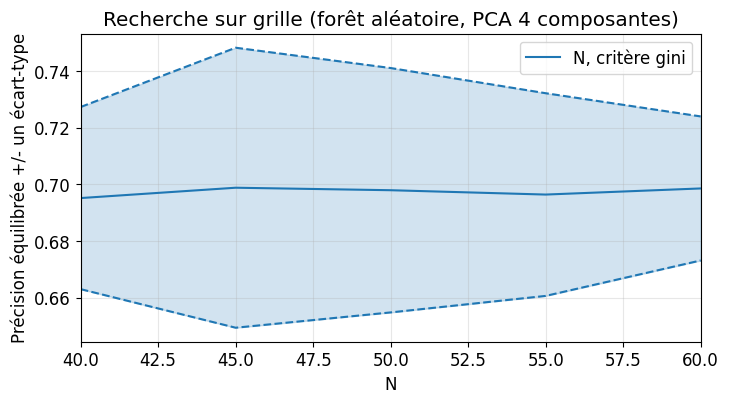

In [82]:
# Affichage des résultats de l'exploration de la grille de valeurs pour la forêt aléatoire (PCA) en mode zoomé

plt.figure(figsize=(8, 4))

ba_forest_pca = grid_forest_pca.cv_results_['mean_test_score']
std_error_forest_pca = grid_forest_pca.cv_results_['std_test_score']

for criterion in Criteria:
    mask = [criterion_tree == criterion for criterion_tree in grid_forest_pca.cv_results_['param_criterion']]

    plt.plot(Nb_estimators, ba_forest_pca[mask], 
             label=f"N, critère {criterion}", color='tab:blue' if criterion == 'gini' else 'tab:green')
    plt.plot(Nb_estimators, ba_forest_pca[mask] + std_error_forest_pca[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    plt.plot(Nb_estimators, ba_forest_pca[mask] - std_error_forest_pca[mask], 
             color='tab:blue' if criterion == 'gini' else 'tab:green', linestyle='dashed')
    
    plt.fill_between(Nb_estimators, 
                     ba_forest_pca[mask] - std_error_forest_pca[mask], 
                     ba_forest_pca[mask] + std_error_forest_pca[mask], 
                     color='tab:blue' if criterion == 'gini' else 'tab:green', alpha=0.2)

plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision équilibrée")
plt.title("Performance de la forêt aléatoire (PCA 4 composantes) avec intervalle de confiance")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

plt.xlabel("N")
plt.ylabel("Précision équilibrée +/- un écart-type")
plt.xlim([Nb_estimators[0], Nb_estimators[-1]])
plt.title("Recherche sur grille (forêt aléatoire, PCA 4 composantes)")
plt.legend(loc='best')

Nopt_pca = grid_forest_pca.best_params_['n_estimators']
print(f"Le critère de mesure de la qualité des divisions est la fonction : {grid_forest.best_params_['criterion']}")
print(f"La valeur optimale de N (PCA) est Nopt = {Nopt_pca}")
print(f"Pour cette valeur optimale, la précision équilibrée obtenue est de {grid_forest_pca.best_score_:.4f} ± {std_error_forest_pca[grid_forest_pca.best_index_]:.4f}")

### Question 21 (0,25 pt)
La réduction de dimension a-t-elle été utile ? Commentez.

## Classifieur final

### Question 22 (0,25 pt)
Au vu des performances observées jusqu'à présent, quel est l'algorithme d'apprentissage, son ou ses valeurs d'hyperparamètres, la transformation des données qui permettent d'obtenir la meilleure performance ? 

Utilisez cet algorithme pour entraîner un modèle de classification final `final_binary_classifier` sur l'ensemble du jeu d'entraînement.

In [ ]:
Nopt = grid_forest.best_params_['n_estimators']
criterion_opt = grid_forest.best_params_['criterion']

final_binary_classifier = RandomForestClassifier(
    n_estimators=Nopt,
    criterion=criterion_opt,
    random_state=123
)
final_binary_classifier.fit(X_scaled, y_train_risk_vs_norisk)  # forêts aléatoires sans PCA

RandomForestClassifier(n_estimators=np.int64(50), random_state=42)

### Question 23 (0,25 pt)

Chargez les données du jeu de test `data/donnees_reservees.csv`. Combinez les étiquettes 1 et 2 en une seule classe. 

In [84]:
df_test = pd.read_csv('data/donnees_reservees.csv')
df_test['Risque'] = np.where(df_test['Risque'] == 2, 1, df_test['Risque'])

### Question 24 (0,25 pt)

Utilisez `final_binary_classifier` pour prédire les étiquettes des observations de ce jeu de données. (N'oubliez pas d'appliquer d'éventuelles transformation des données.) 

In [ ]:
X_test = np.array(df_test.drop('Risque', axis=1))
X_test_scaled = std_scale.transform(X_test)  # on standardise les variables

y_pred_test = final_binary_classifier.predict(X_test_scaled)

### Question 25 (0,5 pt)
Comparez la précision équilibrée sur le jeu de test à celle obtenue en validation croisée lors de la sélection de modèle. Commentez.

In [ ]:
# précision équilibrée sur le jeu de test
y_test = np.array(df_test['Risque'])
ba_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"Précision équilibrée sur le jeu de test : {ba_test}")

# précision équilibrée obtenue en validation croisée
ba_cv = grid_forest.best_score_
std_cv = grid_forest.cv_results_['std_test_score'][grid_forest.best_index_]
print(f"Précision équilibrée en validation croisée : {ba_cv} ± {std_cv}")

Précision équilibrée sur le jeu de test : 0.8510775465094861
Précision équilibrée en validation croisée : 0.8021594612148857 ± 0.044749778731216404


### Question 26 (0,25 pt)
Utilisez [metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher la matrice de confusion de ces prédictions.

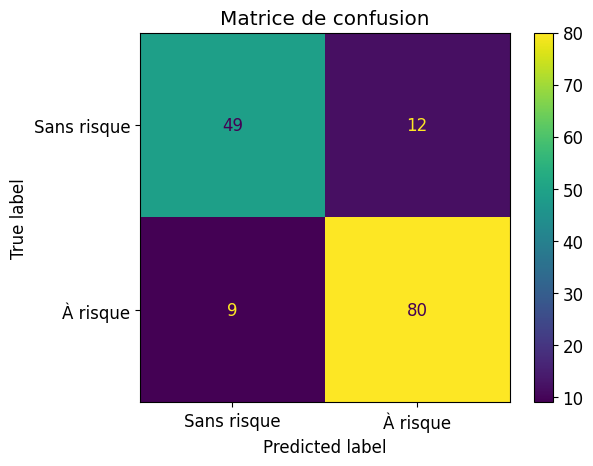

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=["Sans risque", "À risque"])
plt.title("Matrice de confusion")
plt.show()

### Question 27 (0,5 pt)
Commentez cette matrice de précision.

Considéreriez vous possible d'utilise ce classifieur pour décider, sur la base de ces quelques mesures faciles à obtenir en autonomie, quelles femmes référer pour un suivi médical attentif de leur grossesse ?

# 3. Classification multi-classe

### Question 28 (0,5 pt)
Parmi les algorithmes d'apprentissage supervisé que vous avez utilisé dans la section 2, le(s)quel(s) se prête(nt) directement à entraîner un classifieur multiclasse ?

### Question 29 (1,5 pt)
Choisissez un des algorithmes mentionnés à la question précédente et entraînez-le sur le problème de classification multi-classe consistant à prédire le niveau (0, 1 ou 2) de risque obstétrique. Optimisez le ou les hyperparamètre(s) le(s) plus pertinent(s).

### Question 30 (1pt)
Utilisez cet algorithme pour entraîner un modèle multi-classe final sur l'ensemble des données d'entraînement. Évaluez ce modèle sur les données de test. Commentez.